In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("D:\\Courses\\Data Science\\Capstone Project\\Rating_Check\\fandango_scrape.csv")
df.head(10)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [11]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

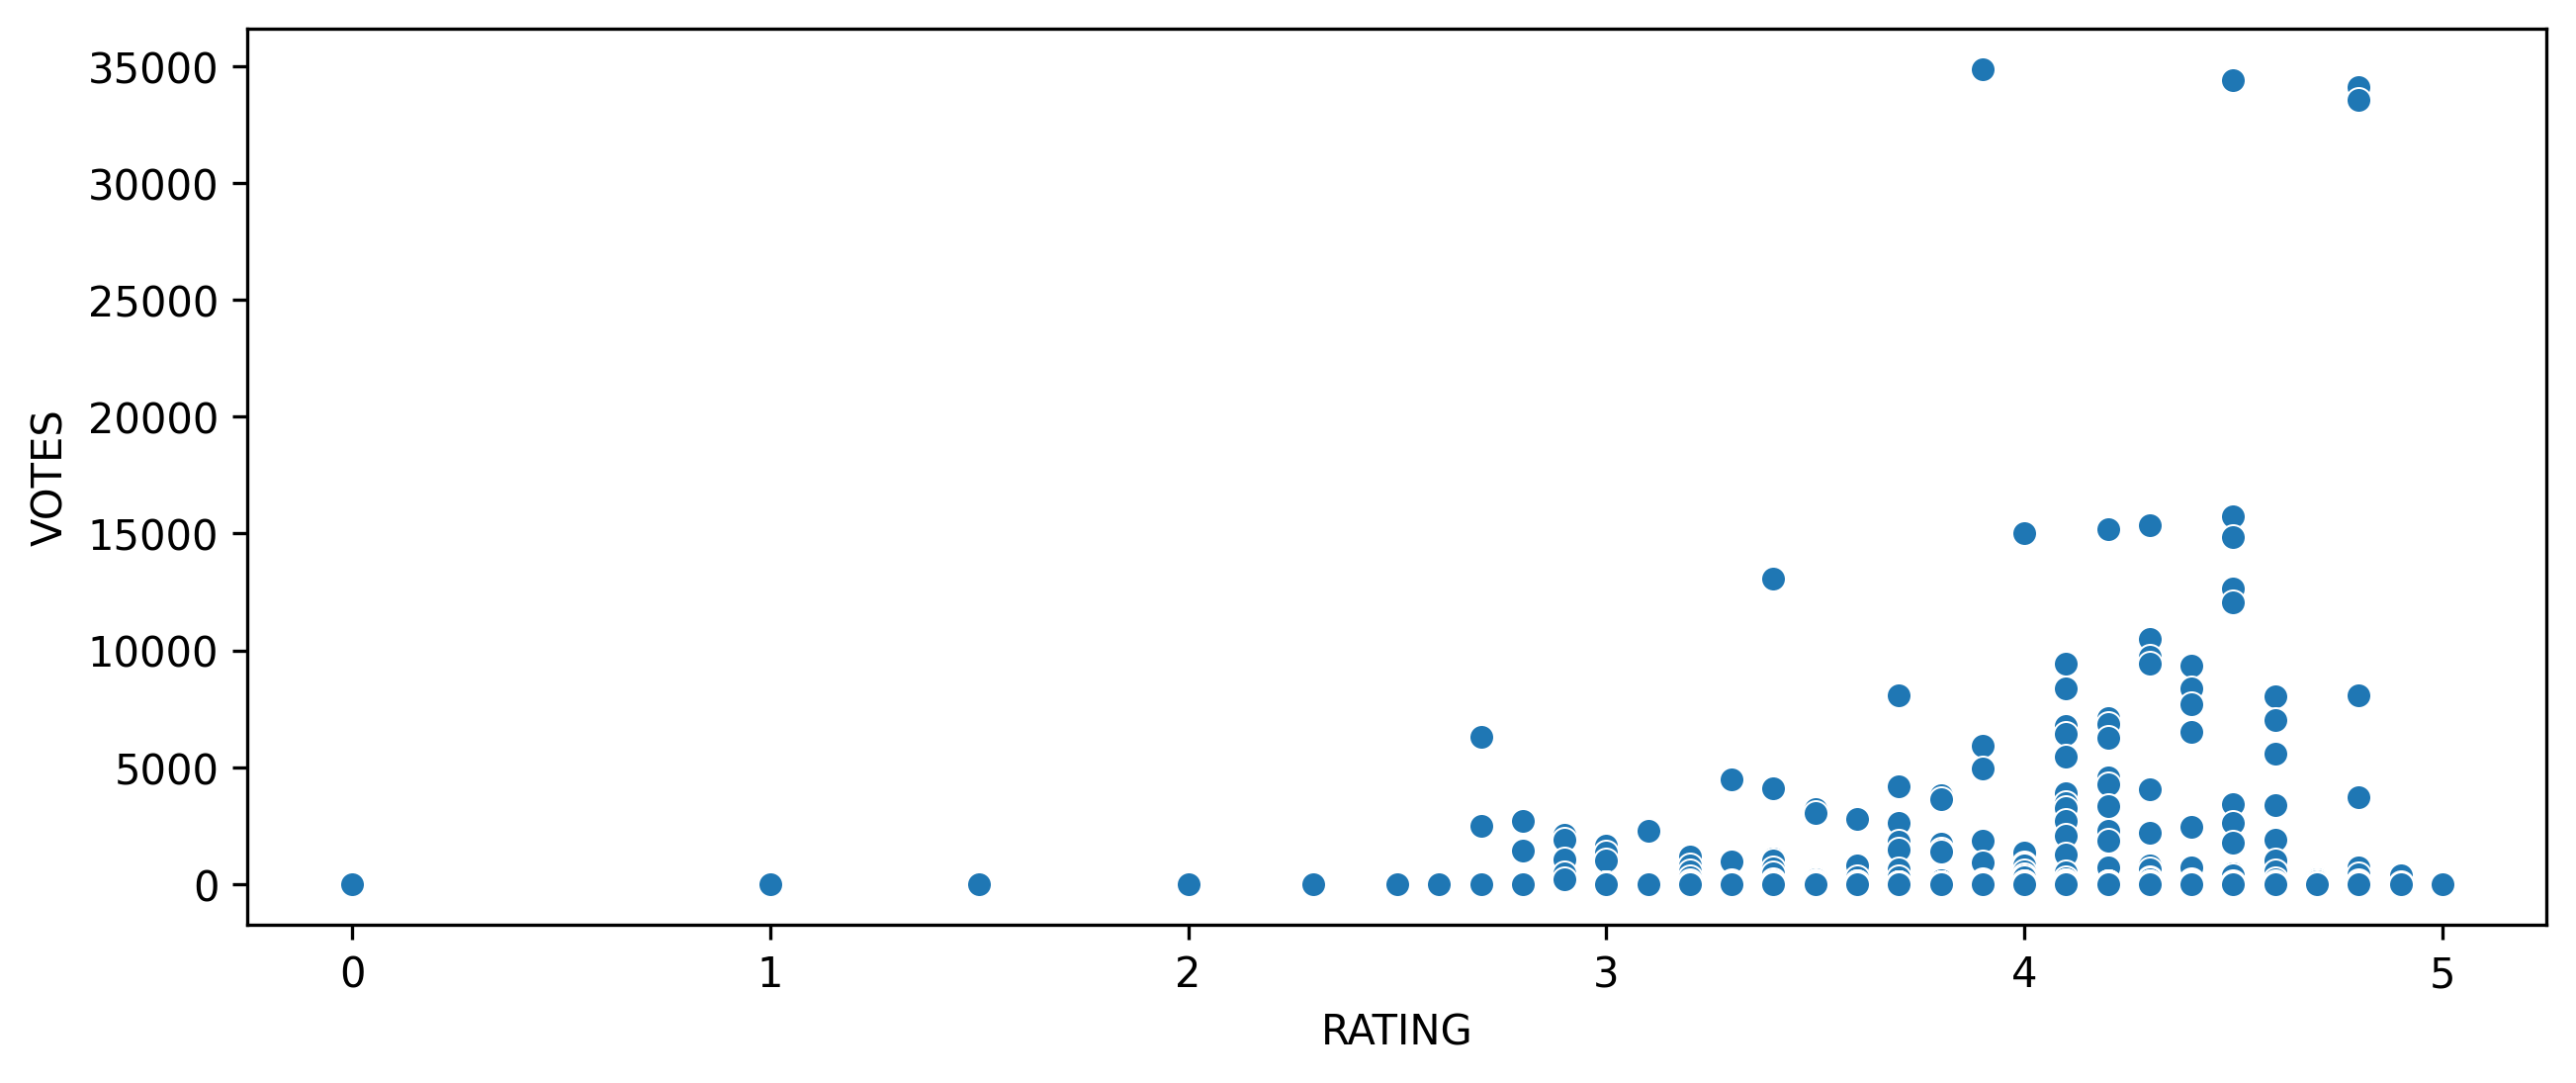

In [15]:
plt.figure(figsize=(10,4), dpi = 300)
sns.scatterplot(data = df,x="RATING", y="VOTES")

In [16]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [33]:
import re
df['YEAR'] = df['FILM'].apply(lambda x: re.findall("\(([^)]*)\)", x)[0])
df.head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [38]:
df['YEAR'].value_counts()

2015                  474
2014                   24
Stratford Festival      2
2016                    1
1964                    1
2012                    1
Shi Gu                  1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

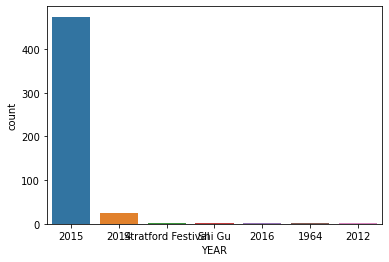

In [41]:
sns.countplot(data=df, x = 'YEAR')

In [46]:
df.nlargest(10, ['VOTES', 'RATING'], keep = 'first')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [48]:
df[df.VOTES == 0]['VOTES'].count()

69

In [49]:
df_new = pd.DataFrame()
df_new = df[df.VOTES != 0]
df_new.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


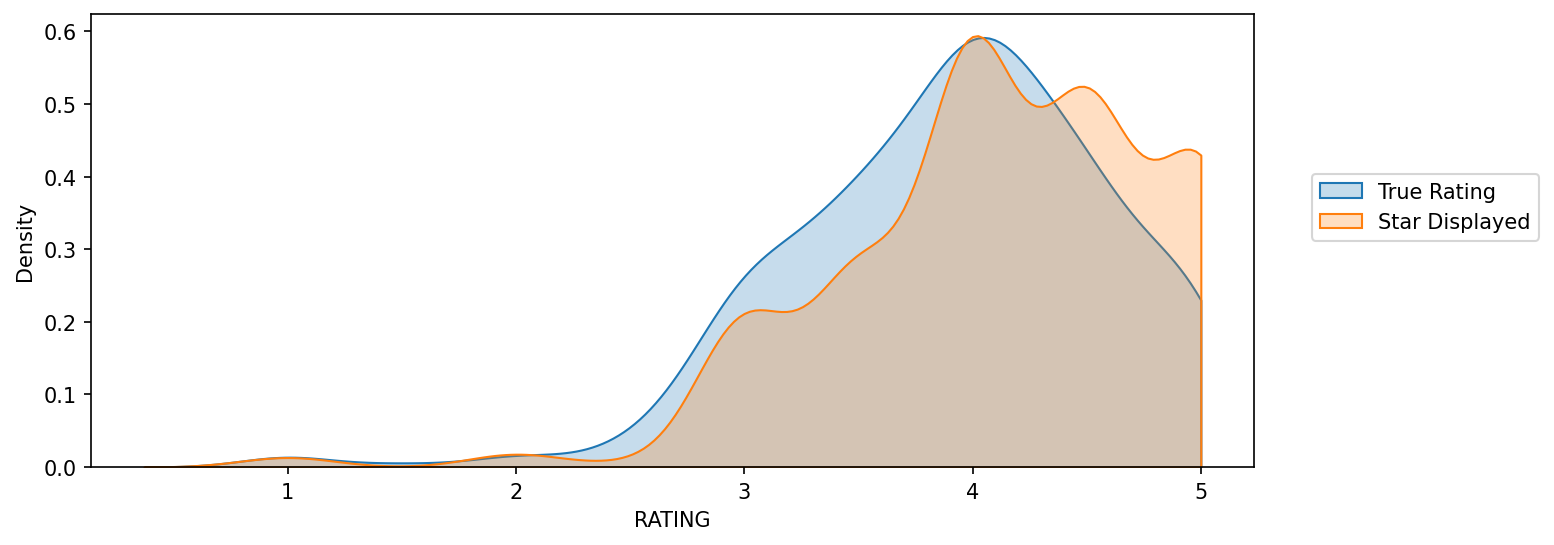

In [54]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data = df_new, x = 'RATING', clip=[0,5], fill=True, label = 'True Rating')
sns.kdeplot(data = df_new, x = 'STARS', clip = [0,5], fill= True, label = 'Star Displayed')

plt.legend(loc = (1.05,0.5))

In [71]:
df_new['STARS-RATING'] = df_new['STARS']- df_new['RATING']
df_new['STARS-RATING'] = df_new['STARS-RATING'].round(2)
df_new

<ipython-input-71-1e0bd63266d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['STARS-RATING'] = df_new['STARS']- df_new['RATING']
<ipython-input-71-1e0bd63266d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['STARS-RATING'] = df_new['STARS-RATING'].round(2)


,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
0,Fifty Shades of Grey (2015),4.0,3.9,34846.0,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390.0,2015,0.0
2,American Sniper (2015),5.0,4.8,34085.0,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538.0,2015,0.2
4,Inside Out (2015),4.5,4.5,15749.0,2015,0.0
...,...,...,...,...,...,...
431,The Intern (2015),5.0,5.0,1.0,2015,0.0
432,The Park Bench (2015),5.0,5.0,1.0,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1.0,2015,0.0
434,Z For Zachariah (2015),5.0,5.0,1.0,2015,0.0


<AxesSubplot:xlabel='STARS-RATING', ylabel='count'>

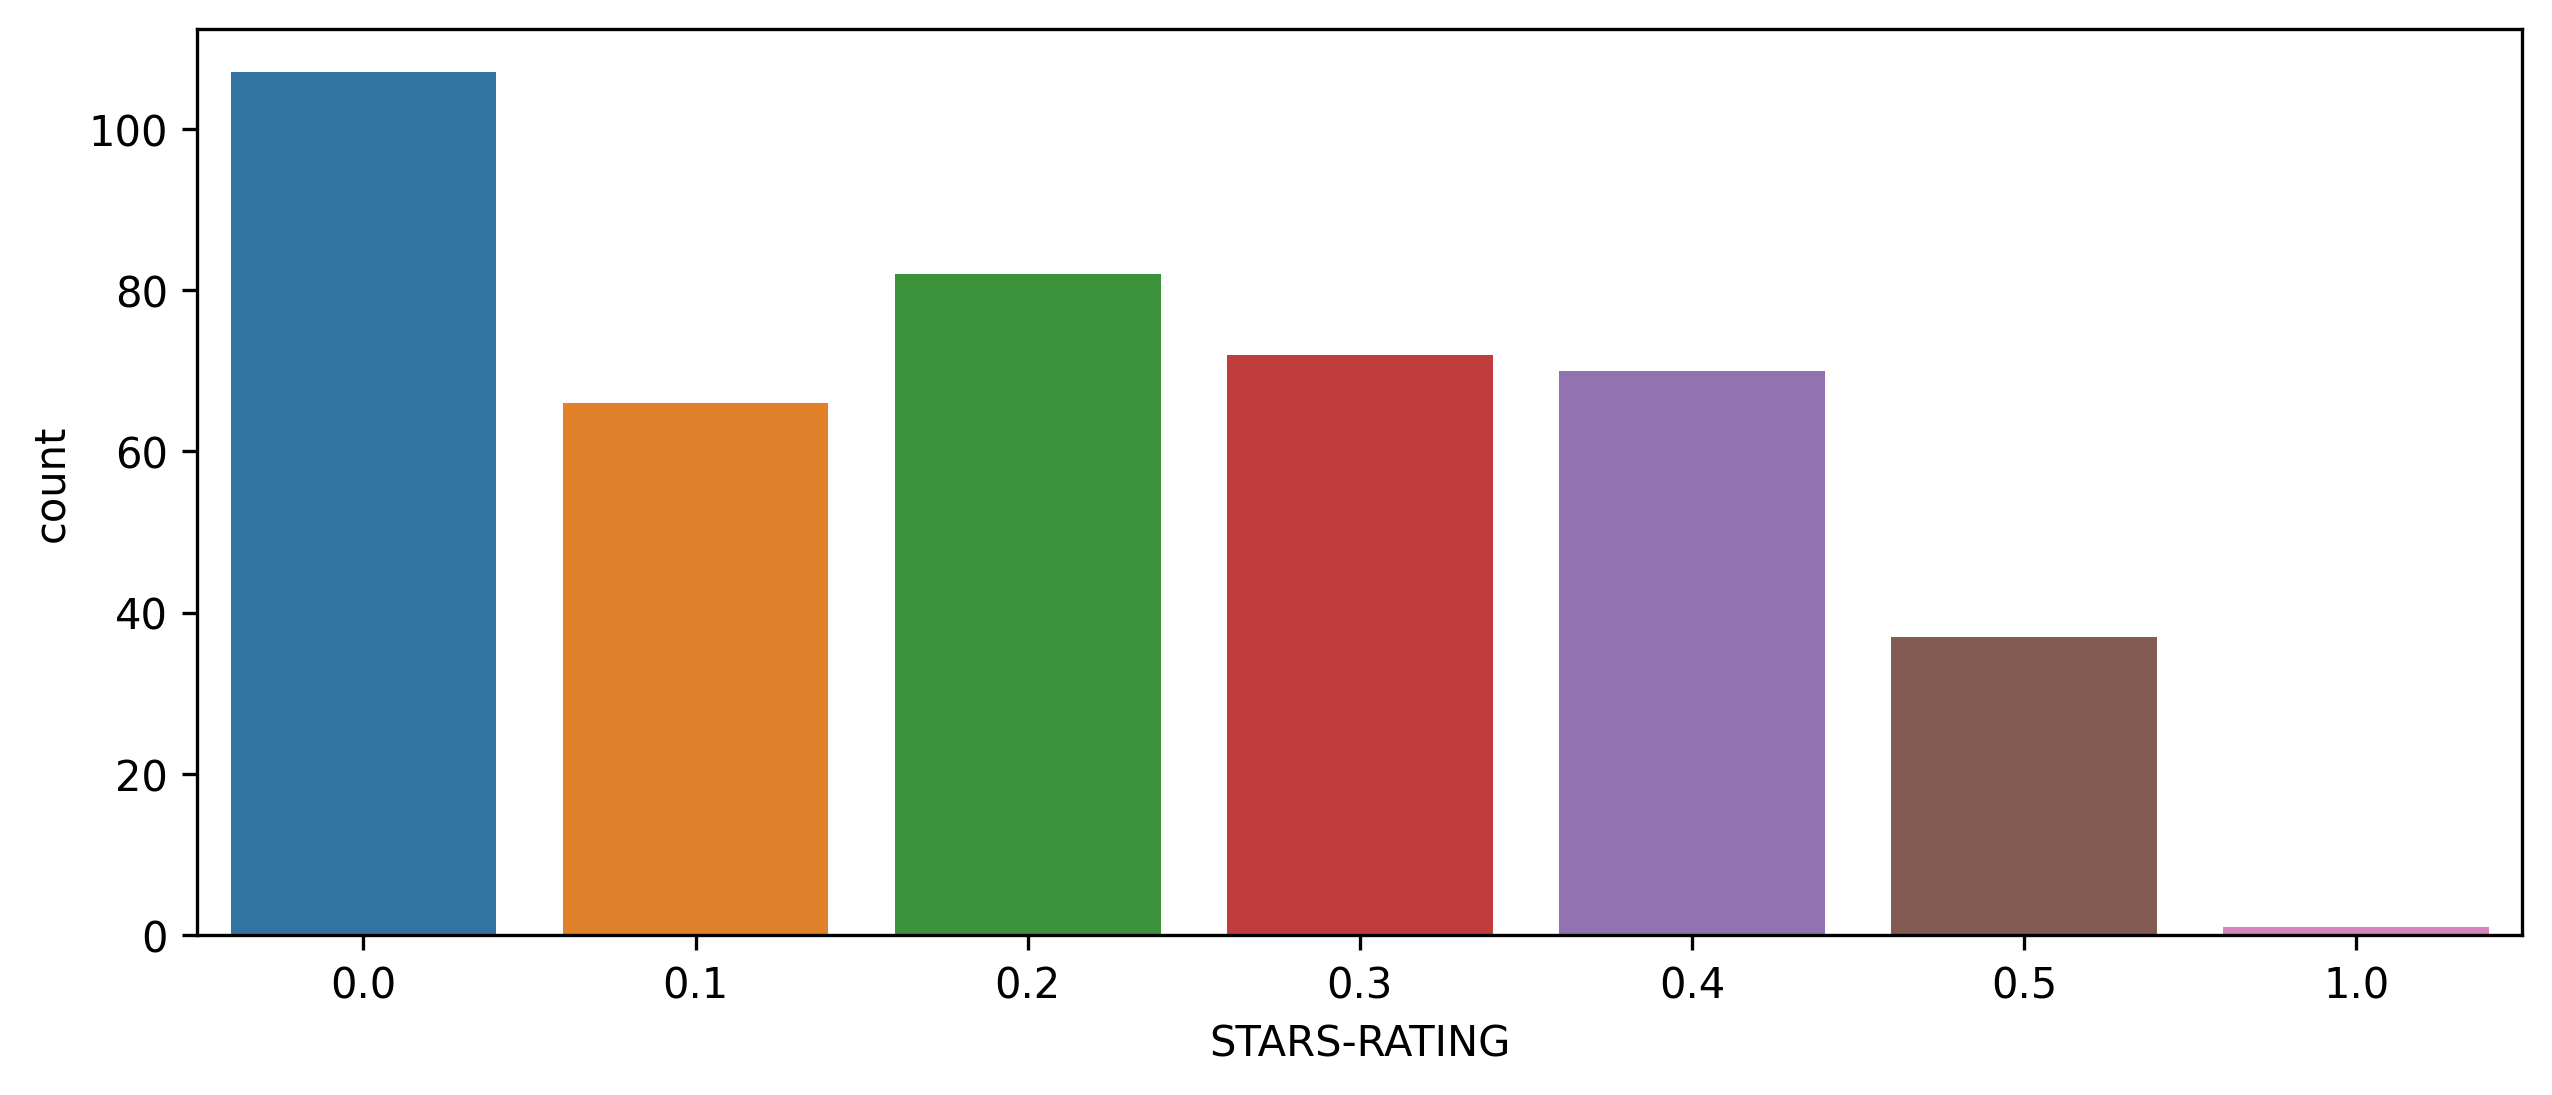

In [73]:
plt.figure(figsize=(10,4),dpi=300)
sns.countplot(data = df_new, x = 'STARS-RATING')

In [76]:
df_new[df_new['STARS-RATING'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
381,Turbo Kid (2015),5.0,4.0,2.0,2015,1.0


In [77]:
other_sites = pd.read_csv("D:\\Courses\\Data Science\\Capstone Project\\Rating_Check\\all_sites_scores.csv")
other_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [78]:
other_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [79]:
other_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

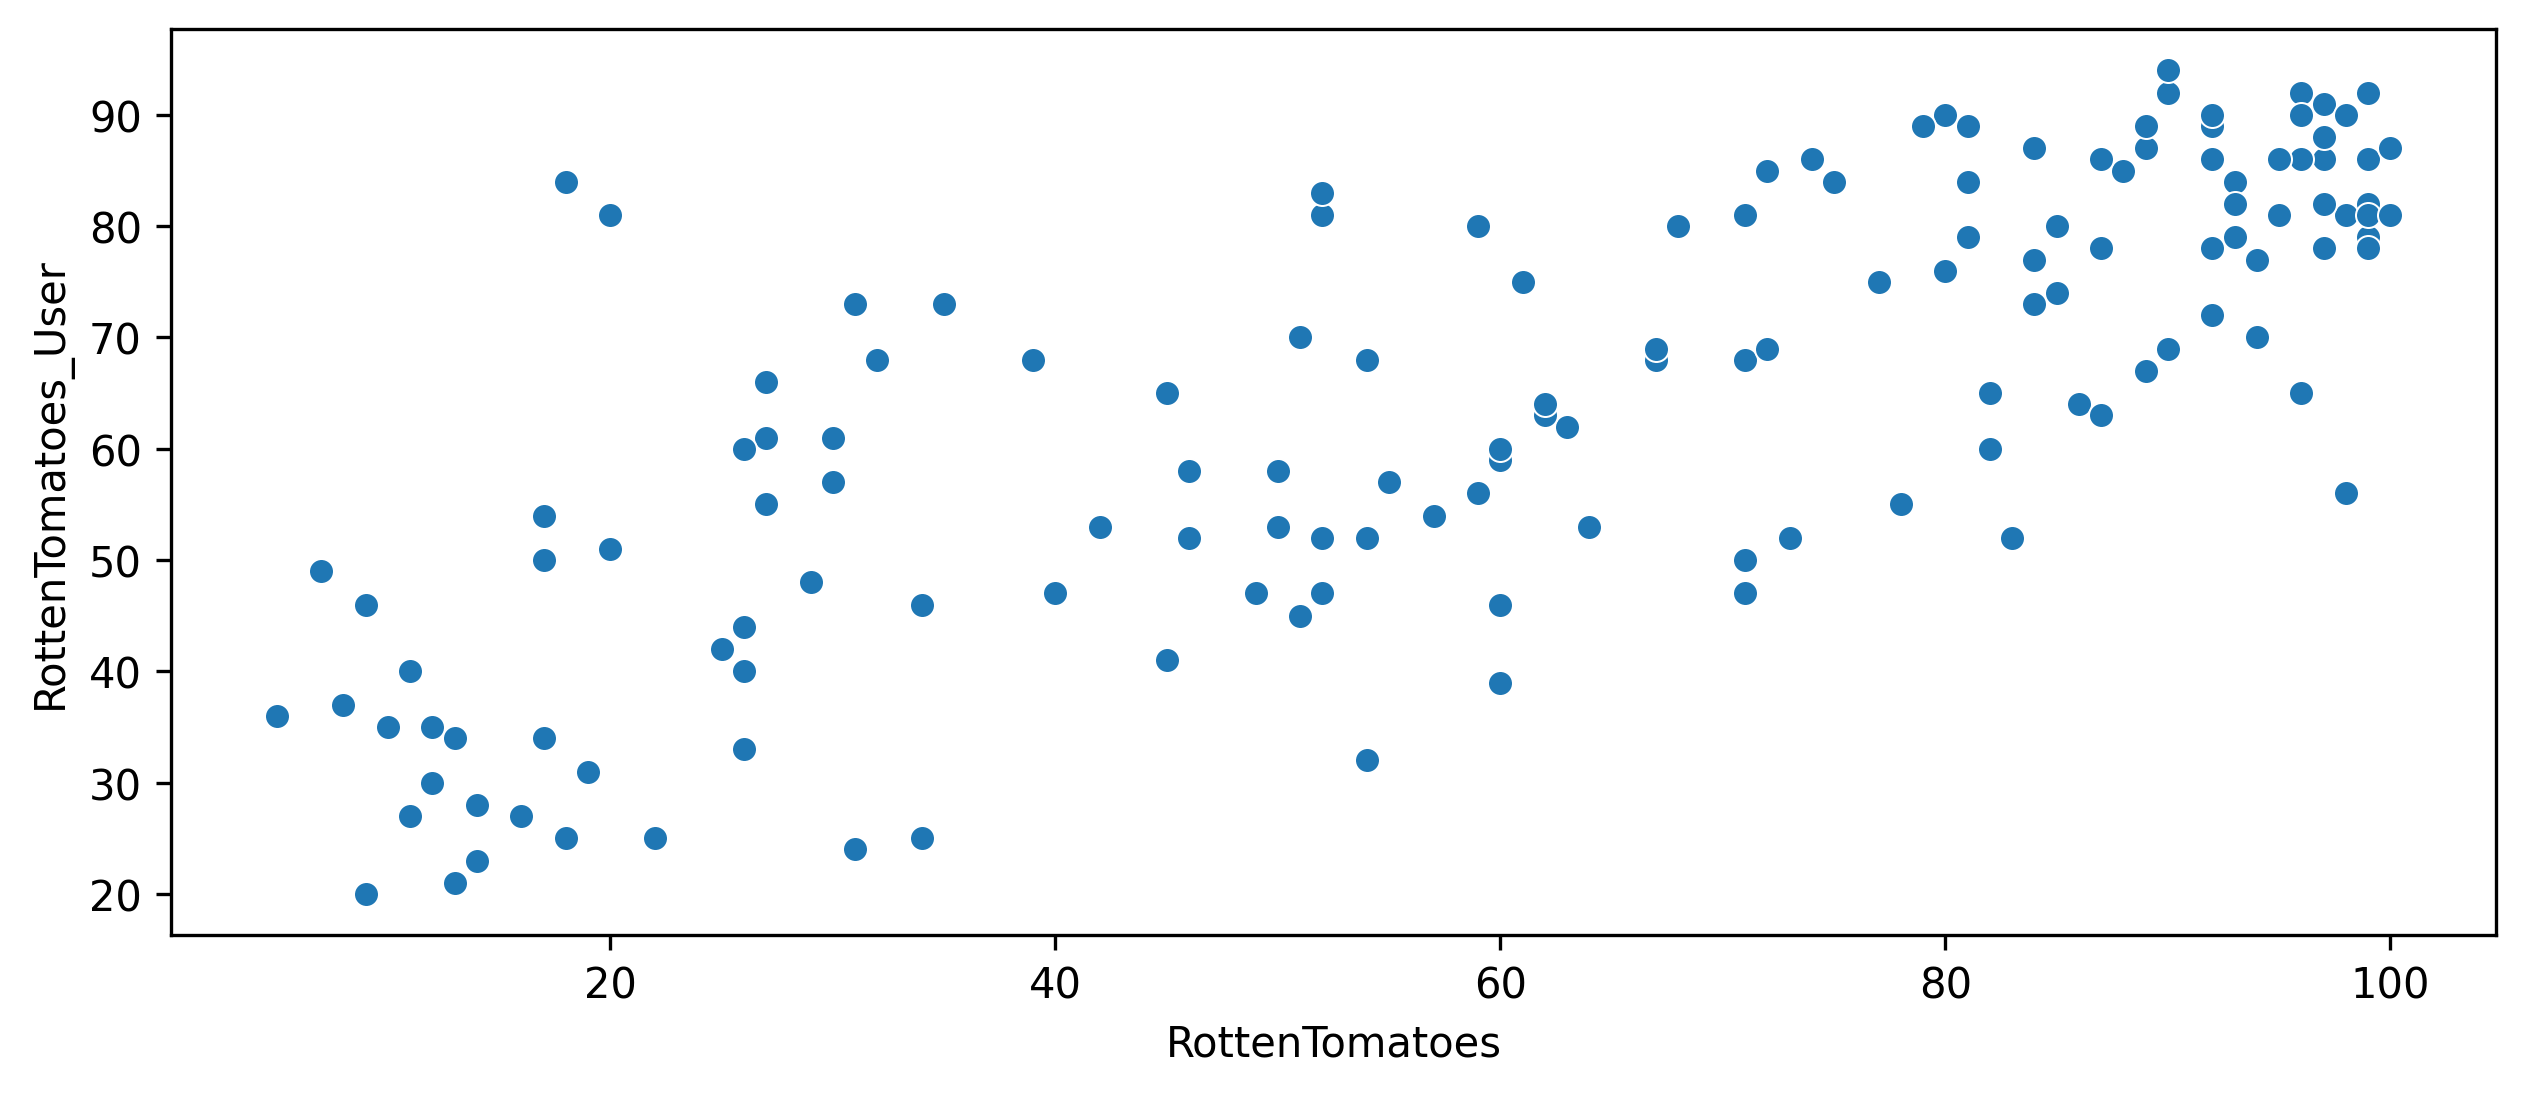

In [80]:
plt.figure(figsize= (10,4), dpi = 300)
sns.sscatterplot(data = other_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')

In [81]:
other_sites['Rotten_diff'] = other_sites.RottenTomatoes - other_sites.RottenTomatoes_User
other_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [82]:
other_sites['Rotten_diff'].apply(abs).mean()

15.095890410958905

Text(0.5, 1.0, 'RT Critics Score minus RT User Score')

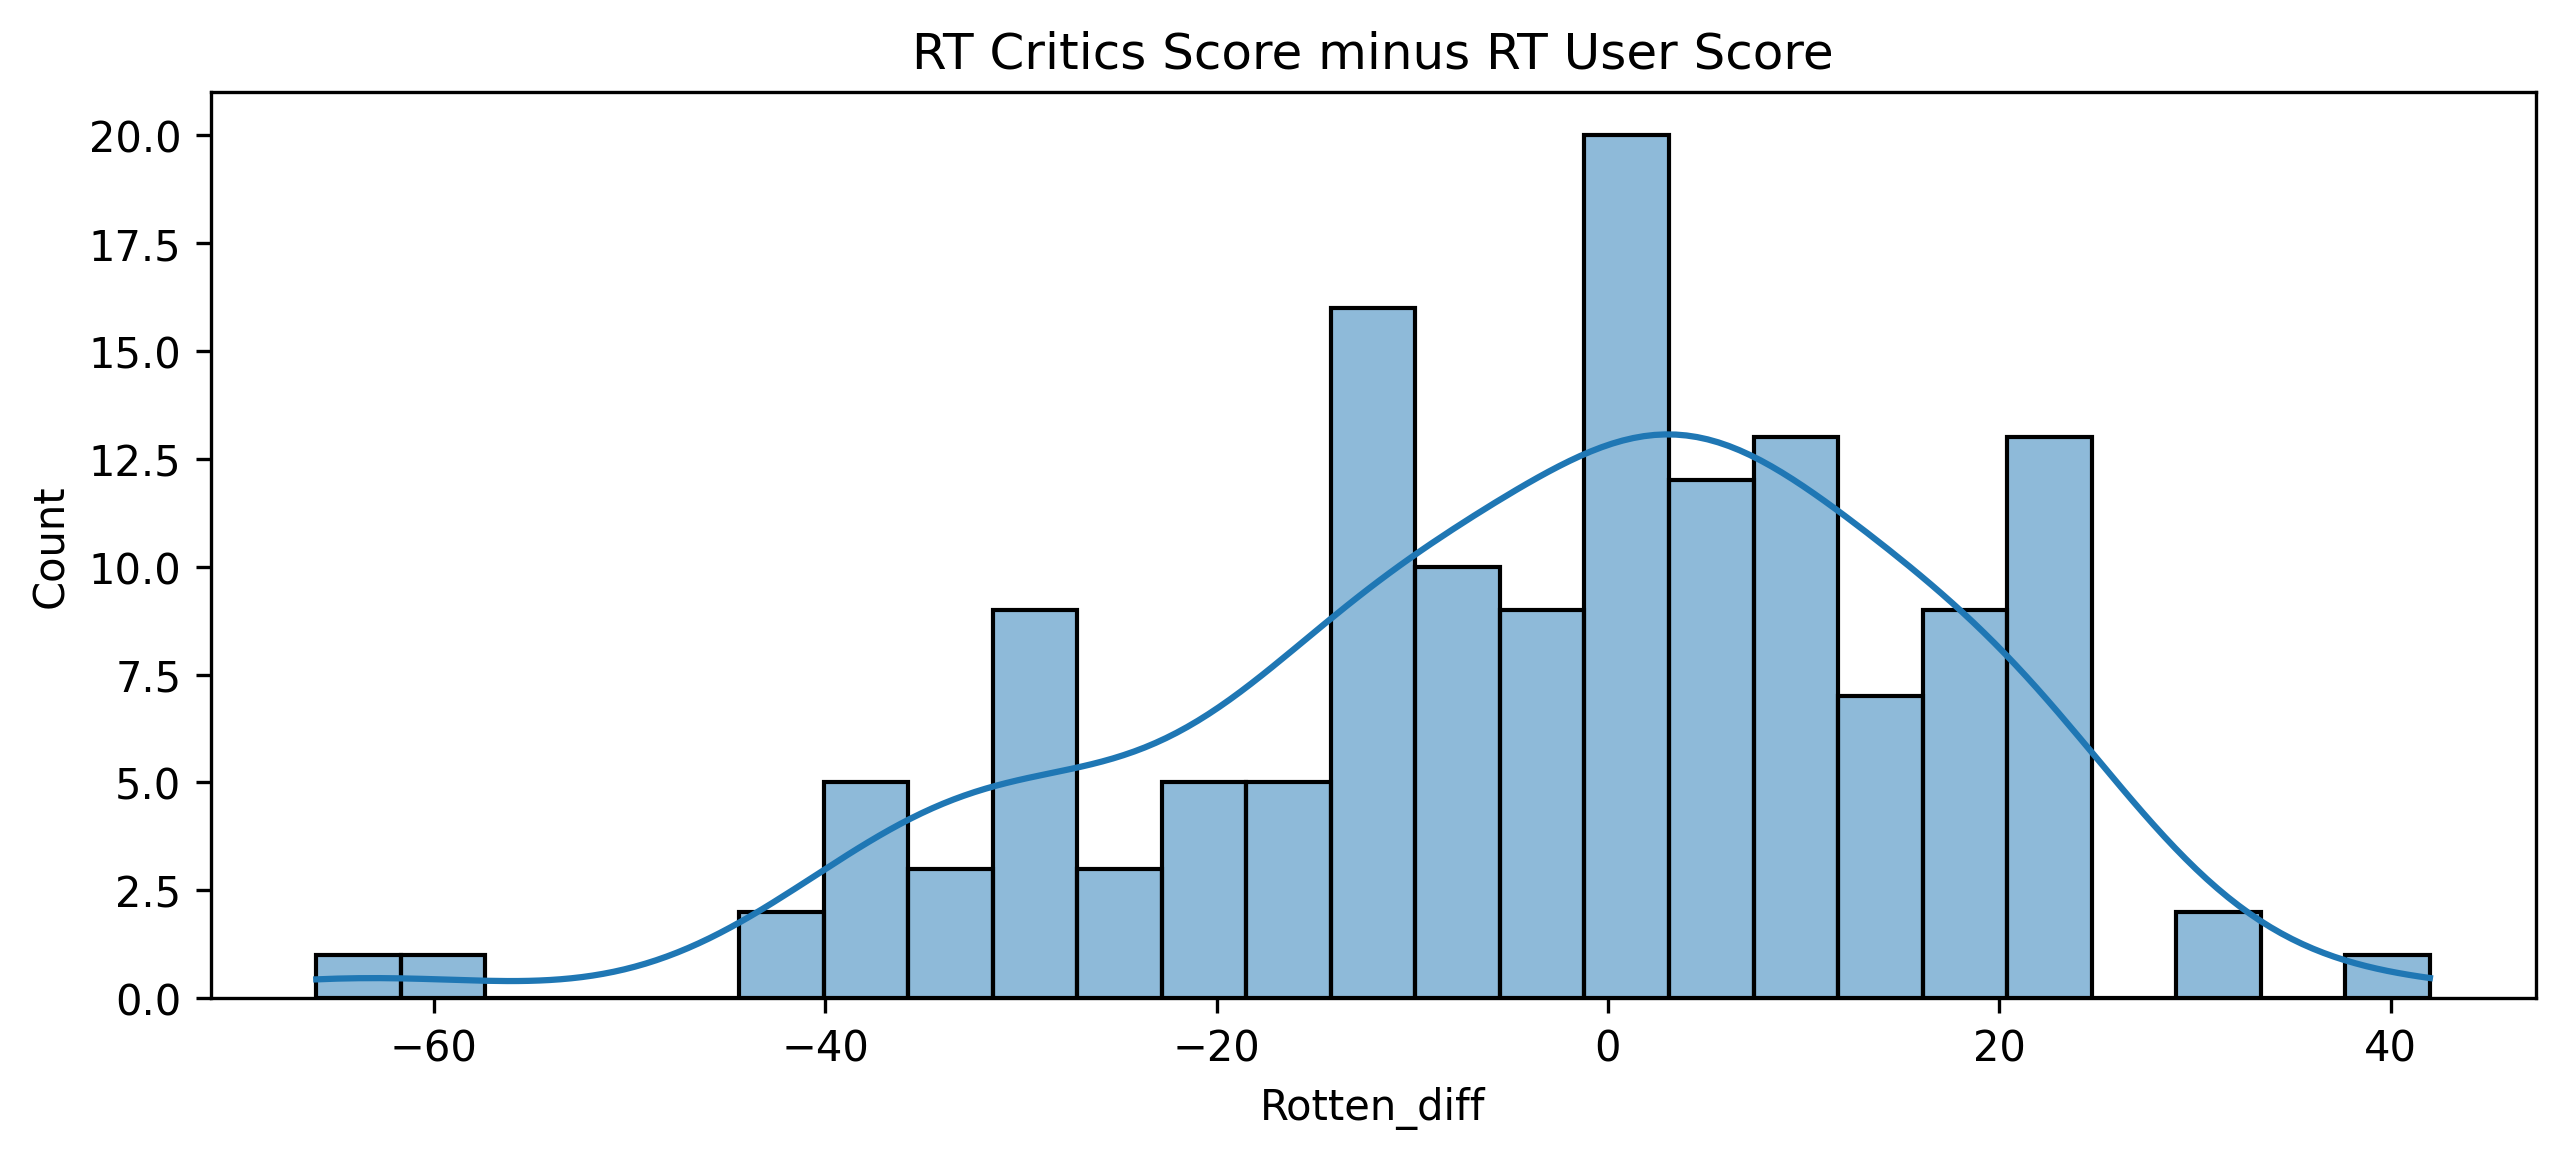

In [83]:
plt.figure(figsize=(10,4), dpi = 300)
sns.histplot(data = other_sites, x = 'Rotten_diff', kde=True, bins = 25)
plt.title('RT Critics Score minus RT User Score')

Text(0.5, 1.0, 'Abs RT Critics Score minus RT User Score')

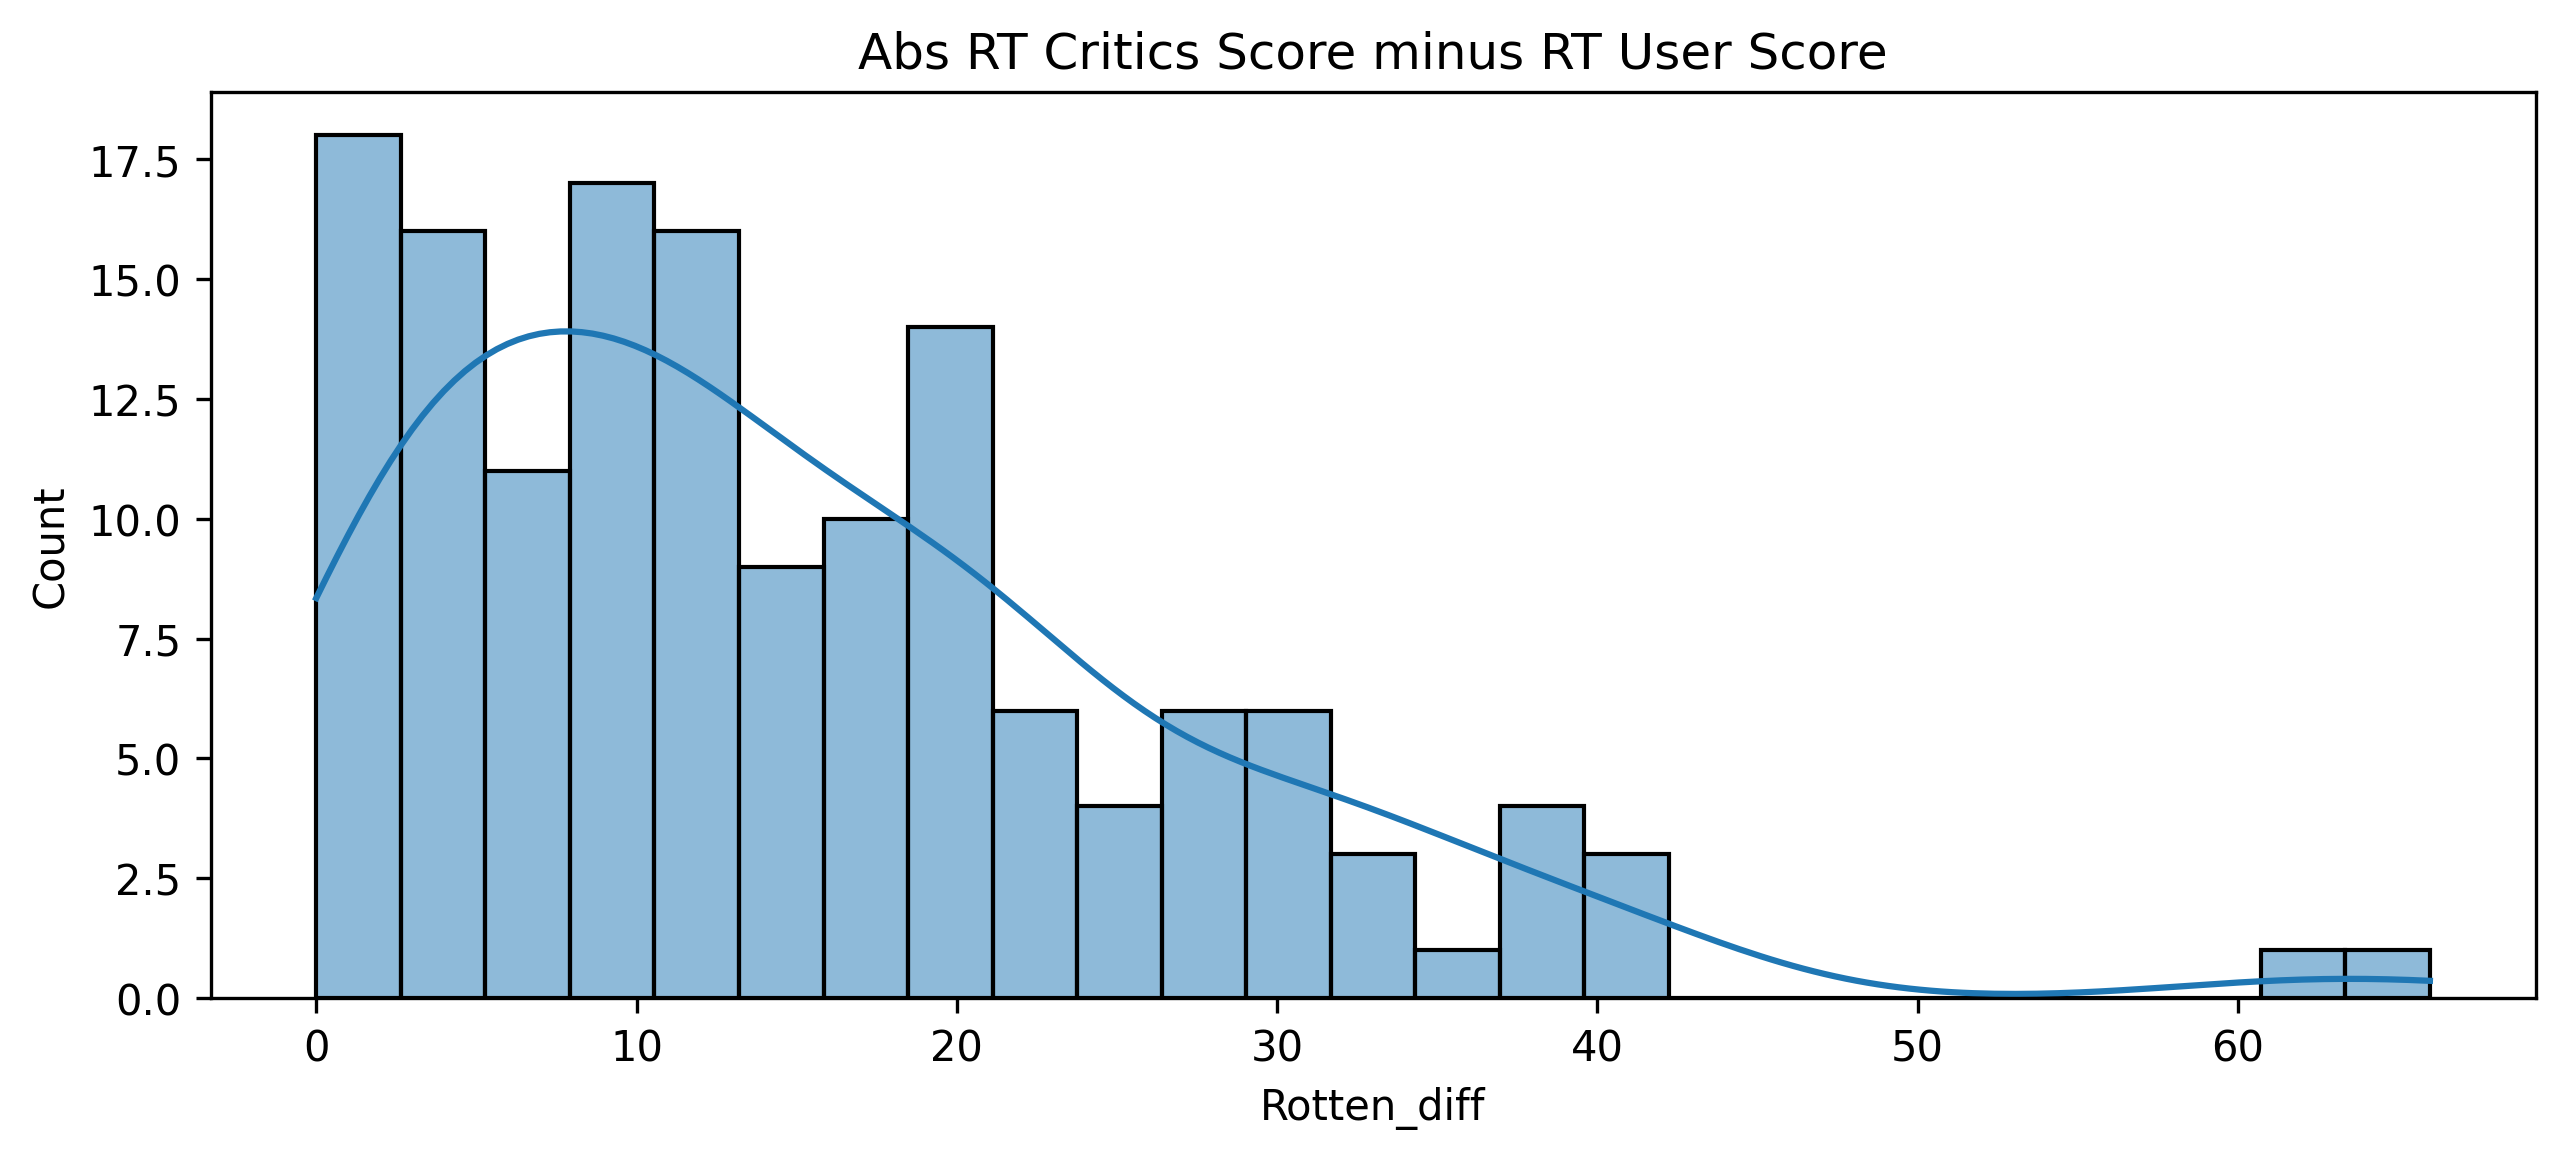

In [84]:
plt.figure(figsize=(10,4), dpi = 300)
sns.histplot(d = 'other_sites[Rotten_diff',].apply(abs) kde=True, bins = 25)
plt.title('RTAbs  Critics Score minus RT User Score')

In [89]:
other_sites[['FILM', 'Rotten_diff']].nsmallest(5, 'Rotten_diff')

,FILM,Rotten_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [90]:
other_sites[['FILM', 'Rotten_diff']].nlargest(5, 'Rotten_diff')

,FILM,Rotten_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24
